In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
data_set=pd.read_csv("apple_quality1.csv")
x=data_set.iloc[:,[2,3]].values
y=data_set.iloc[:,8].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.01,random_state=0)
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)

['bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'good'
 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good']


In [3]:
import sklearn.metrics as sm
print(sm.confusion_matrix(y_test,y_pred),sm.accuracy_score(y_test,y_pred),sm.precision_score(y_test,y_pred,average="weighted"),
     sm.recall_score(y_test,y_pred,average="weighted"),sm.f1_score(y_test,y_pred,average="weighted"))

[[15  9]
 [ 8  8]] 0.575 0.579539641943734 0.575 0.5769181173436493


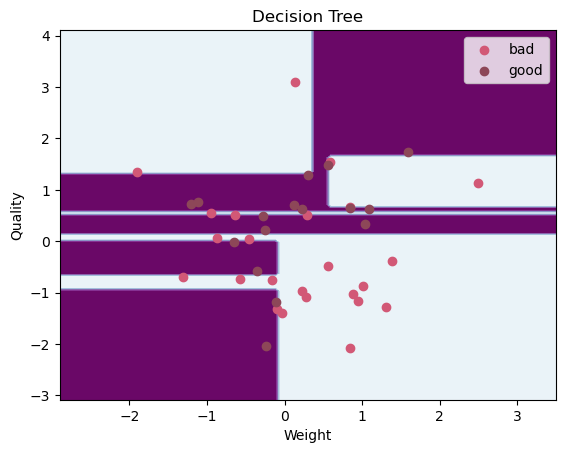

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(classifier.fit(x_test,y_test),x_test,cmap=plt.cm.BuPu,response_method='predict')
rgb_one=(np.random.rand(),np.random.rand(),np.random.rand())
rgb_two=(np.random.rand(),np.random.rand(),np.random.rand())
color_array = []
color_array.append(rgb_one)
color_array.append(rgb_two)
for i,j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test==j,0],x_test[y_test==j,1],color=color_array[i],label=j)
plt.title("Decision Tree")
plt.xlabel(data_set.columns[2])
plt.ylabel(data_set.columns[8])
plt.legend()
plt.show()
